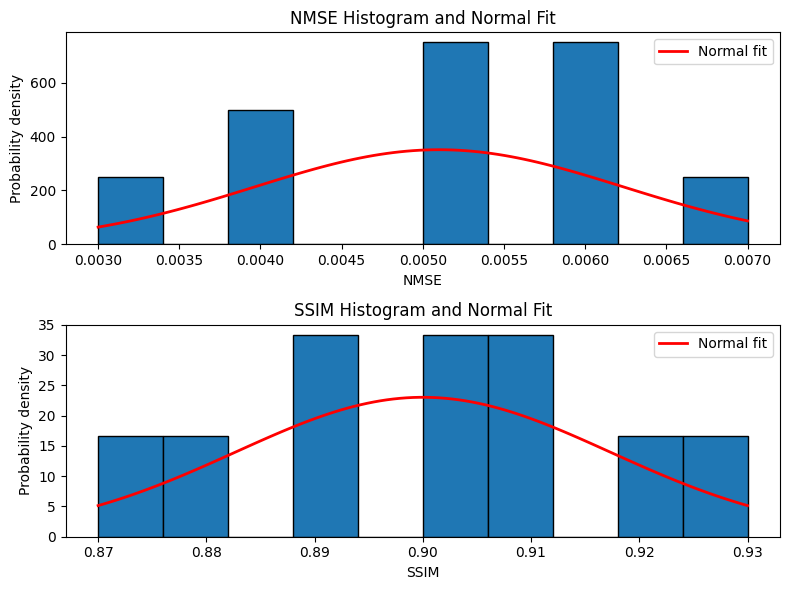

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 假设您的数据存储在列表 ssim 和 nmse 中
ssim = [0.92, 0.88, 0.91, 0.90, 0.89, 0.87, 0.93, 0.91, 0.90, 0.89]
nmse = [0.005, 0.006, 0.004, 0.005, 0.006, 0.007, 0.003, 0.004, 0.005, 0.006]

# 绘制 nmse 直方图和正态分布曲线
plt.figure(figsize=(8, 6))
plt.subplot(2, 1, 1)
plt.hist(nmse, bins=10, density=True, edgecolor='black')
mu, std = norm.fit(nmse)
x = np.linspace(min(nmse), max(nmse), 100)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('NMSE')
plt.ylabel('Probability density')
plt.title('NMSE Histogram and Normal Fit')
plt.legend()

# 绘制 ssim 直方图和正态分布曲线
plt.subplot(2, 1, 2)
plt.hist(ssim, bins=10, density=True, edgecolor='black')
mu, std = norm.fit(ssim)
x = np.linspace(min(ssim), max(ssim), 100)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('SSIM')
plt.ylabel('Probability density')
plt.title('SSIM Histogram and Normal Fit')
plt.legend()

plt.tight_layout()
plt.show()

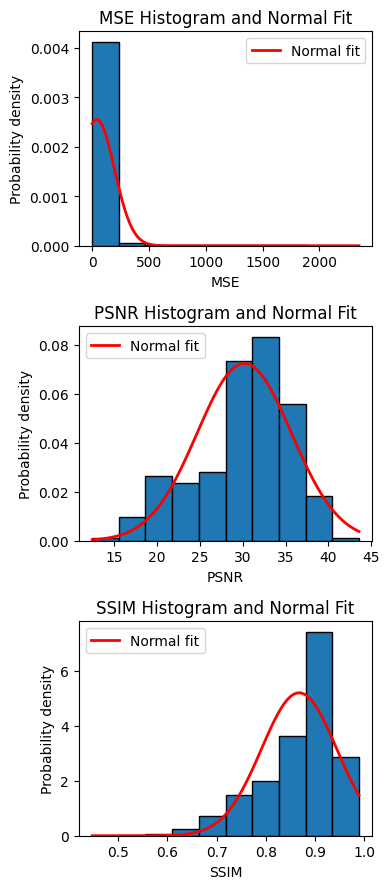

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import re

# 读取文件内容
with open('output/inference/0611_upconv4_mul2347pretrain_val2347_无图3017/alog.txt', 'r') as f:
    lines = f.readlines()

# 初始化列表变量
psnr_list = []
ssim_list = []
mse_list = []

# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1))
        
        # 将值添加到对应的列表中
        psnr_list.append(psnr)
        ssim_list.append(ssim)
        mse_list.append(mse)

# print("PSNR:", psnr_list)
# print("SSIM:", ssim_list)
# print("MSE:", mse_list)

# # 假设您的数据存储在列表 ssim 和 nmse 中
# ssim = [0.92, 0.88, 0.91, 0.90, 0.89, 0.87, 0.93, 0.91, 0.90, 0.89]
# nmse = [0.005, 0.006, 0.004, 0.005, 0.006, 0.007, 0.003, 0.004, 0.005, 0.006]

# 绘制 nmse 直方图和正态分布曲线
plt.figure(figsize=(4, 9))
plt.subplot(3, 1, 1)
plt.hist(mse_list, bins=10, density=True, edgecolor='black')
mu, std = norm.fit(mse_list)
x = np.linspace(min(mse_list), max(mse_list), 100)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('MSE')
plt.ylabel('Probability density')
plt.title('MSE Histogram and Normal Fit')
plt.legend()

# 绘制 psnr 直方图和正态分布曲线
plt.subplot(3, 1, 2)
plt.hist(psnr_list, bins=10, density=True, edgecolor='black')
mu, std = norm.fit(psnr_list)
x = np.linspace(min(psnr_list), max(psnr_list), 100)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('PSNR')
plt.ylabel('Probability density')
plt.title('PSNR Histogram and Normal Fit')
plt.legend()

# 绘制 ssim 直方图和正态分布曲线
plt.subplot(3, 1, 3)
plt.hist(ssim_list, bins=10, density=True, edgecolor='black')
mu, std = norm.fit(ssim_list)
x = np.linspace(min(ssim_list), max(ssim_list), 100)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('SSIM')
plt.ylabel('Probability density')
plt.title('SSIM Histogram and Normal Fit')
plt.legend()

plt.tight_layout()
plt.show()

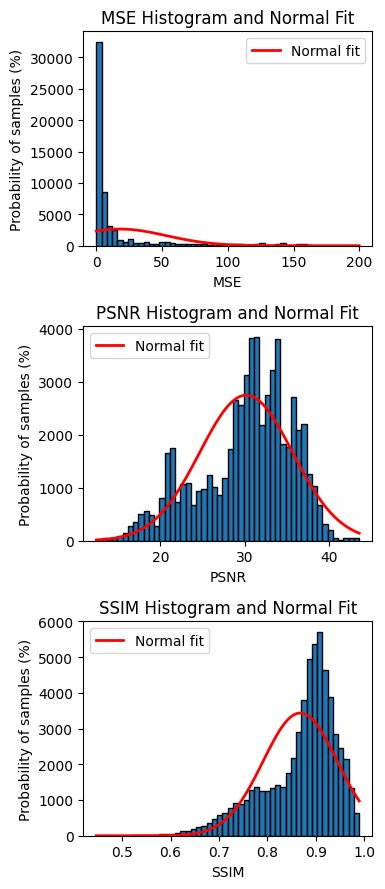

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re

# 读取文件内容
with open('output/inference/0611_upconv4_mul2347pretrain_val2347_无图3017/alog.txt', 'r') as f:
    lines = f.readlines()

# 初始化列表变量
psnr_list = []
ssim_list = []
mse_list = []
binss = 50
# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1))
        
        # 将值添加到对应的列表中
        psnr_list.append(psnr)
        ssim_list.append(ssim)
        mse_list.append(mse)

# 设置图像大小和子图
plt.figure(figsize=(4, 9))

mse_threshold = 200
mse_list = [m for m in mse_list if m <= mse_threshold]
# MSE 直方图和正态分布曲线
plt.subplot(3, 1, 1)
counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black')
mu, std = norm.fit(mse_list)
x = np.linspace(min(mse_list), max(mse_list), 100)
plt.plot(x, norm.pdf(x, mu, std) * len(mse_list) * (bins[1] - bins[0]), 'r-', linewidth=2, label='Normal fit')
# plt.xlim(0, 200)  # 限制横坐标范围
plt.xlabel('MSE')
plt.ylabel('Probability of samples (%)')
plt.title('MSE Histogram and Normal Fit')
plt.legend()

# PSNR 直方图和正态分布曲线
plt.subplot(3, 1, 2)
counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black')
mu, std = norm.fit(psnr_list)
x = np.linspace(min(psnr_list), max(psnr_list), 100)
plt.plot(x, norm.pdf(x, mu, std) * len(psnr_list) * (bins[1] - bins[0]), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('PSNR')
plt.ylabel('Probability of samples (%)')
plt.title('PSNR Histogram and Normal Fit')
plt.legend()

# SSIM 直方图和正态分布曲线
plt.subplot(3, 1, 3)
counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black')
mu, std = norm.fit(ssim_list)
x = np.linspace(min(ssim_list), max(ssim_list), 100)
plt.plot(x, norm.pdf(x, mu, std) * len(ssim_list) * (bins[1] - bins[0]), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('SSIM')
plt.ylabel('Probability of samples (%)')
plt.title('SSIM Histogram and Normal Fit')
plt.legend()

plt.tight_layout()
plt.show()

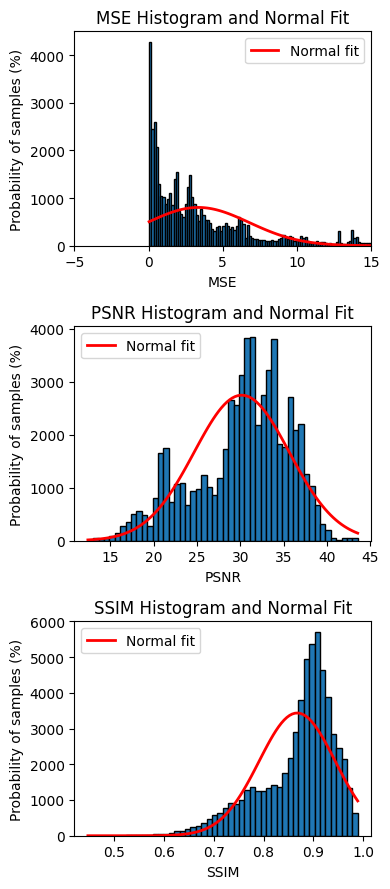

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re

# 读取文件内容
with open('output/inference/0611_upconv4_mul2347pretrain_val2347_无图3017/alog.txt', 'r') as f:
    lines = f.readlines()

# 初始化列表变量
psnr_list = []
ssim_list = []
mse_list = []
binss = 50
# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1))
        
        # 将值添加到对应的列表中
        psnr_list.append(psnr)
        ssim_list.append(ssim)
        mse_list.append(mse)

# 设置图像大小和子图
plt.figure(figsize=(4, 9))

mse_threshold = 15
mse_list = [m for m in mse_list if m <= mse_threshold]
# MSE 直方图和正态分布曲线
plt.subplot(3, 1, 1)
counts, bins, patches = plt.hist(mse_list, bins=100, edgecolor='black')
mu, std = norm.fit(mse_list)
x = np.linspace(min(mse_list), max(mse_list), 100)
plt.plot(x, norm.pdf(x, mu, std) * len(mse_list) * (bins[1] - bins[0]), 'r-', linewidth=2, label='Normal fit')
plt.xlim(-5, 15)  # 限制横坐标范围
plt.xlabel('MSE')
plt.ylabel('Probability of samples (%)')
plt.title('MSE Histogram and Normal Fit')
plt.legend()

# PSNR 直方图和正态分布曲线
plt.subplot(3, 1, 2)
counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black')
mu, std = norm.fit(psnr_list)
x = np.linspace(min(psnr_list), max(psnr_list), 100)
plt.plot(x, norm.pdf(x, mu, std) * len(psnr_list) * (bins[1] - bins[0]), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('PSNR')
plt.ylabel('Probability of samples (%)')
plt.title('PSNR Histogram and Normal Fit')
plt.legend()

# SSIM 直方图和正态分布曲线
plt.subplot(3, 1, 3)
counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black')
mu, std = norm.fit(ssim_list)
x = np.linspace(min(ssim_list), max(ssim_list), 100)
plt.plot(x, norm.pdf(x, mu, std) * len(ssim_list) * (bins[1] - bins[0]), 'r-', linewidth=2, label='Normal fit')
plt.xlabel('SSIM')
plt.ylabel('Probability of samples (%)')
plt.title('SSIM Histogram and Normal Fit')
plt.legend()

plt.tight_layout()
plt.show()

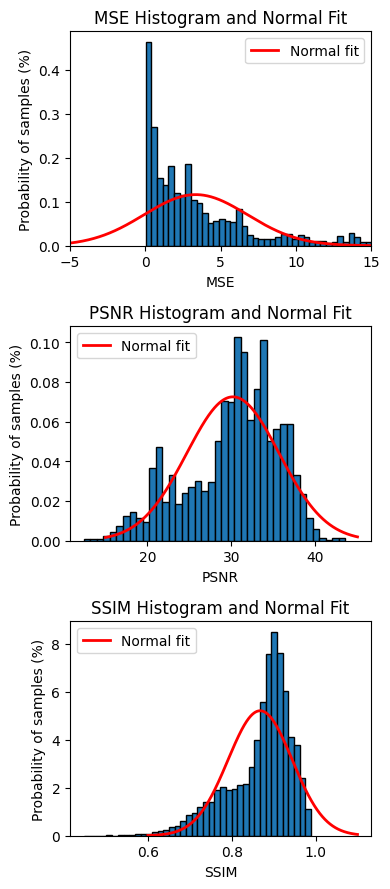

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re

# 读取文件内容
with open('output/inference/0611_upconv4_mul2347pretrain_val2347_无图3017/alog.txt', 'r') as f:
    lines = f.readlines()

# 初始化列表变量
psnr_list = []
ssim_list = []
mse_list = []
binss = 40
# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1))
        
        # 将值添加到对应的列表中
        psnr_list.append(psnr)
        ssim_list.append(ssim)
        mse_list.append(mse)

# 设置图像大小和子图
plt.figure(figsize=(4, 9))

mse_threshold = 15
mse_list = [m for m in mse_list if m <= mse_threshold]

# MSE 直方图和正态分布曲线
plt.subplot(3, 1, 1)
counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', density=True)
mu, std = norm.fit(mse_list)
x = np.linspace(-5, 15, 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
plt.xlim(-5, 15)  # 限制横坐标范围
plt.xlabel('MSE')
plt.ylabel('Probability of samples (%)')
plt.title('MSE Histogram and Normal Fit')
plt.legend()

# PSNR 直方图和正态分布曲线
plt.subplot(3, 1, 2)
counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black', density=True)
mu, std = norm.fit(psnr_list)
x = np.linspace(15,45, 1000)
# x = np.linspace(min(psnr_list), max(psnr_list), 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
# plt.xlim(-5, 15)  # 限制横坐标范围
plt.xlabel('PSNR')
plt.ylabel('Probability of samples (%)')
plt.title('PSNR Histogram and Normal Fit')
plt.legend()

# SSIM 直方图和正态分布曲线
plt.subplot(3, 1, 3)
counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True)
mu, std = norm.fit(ssim_list)
x = np.linspace(0.6,1.1, 1000)
# x = np.linspace(min(ssim_list), max(ssim_list), 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
# plt.xlim(0.5, 1.1)  # 限制横坐标范围
plt.xlabel('SSIM')
plt.ylabel('Probability of samples (%)')
plt.title('SSIM Histogram and Normal Fit')
plt.legend()

plt.tight_layout()
plt.show()

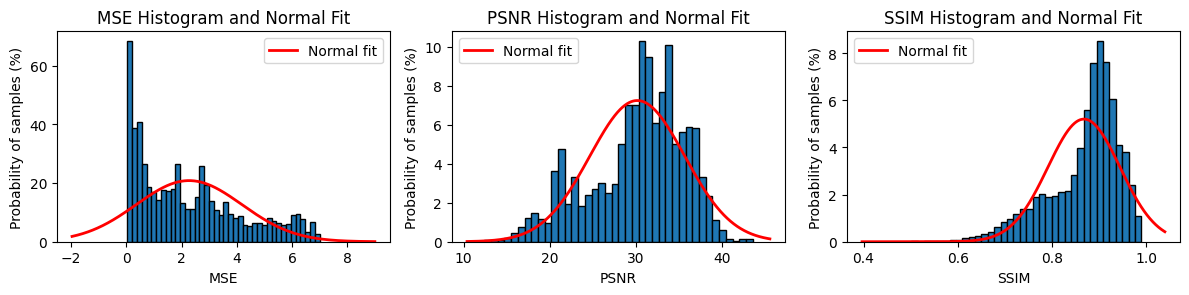

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import re
from matplotlib.ticker import FuncFormatter

def to_percent(y,position):
    return str(int((100*y))) #+"%"#这里可以用round（）函数设置取几位小数

# 读取文件内容
with open('output/inference/0611_upconv4_mul2347pretrain_val2347_无图3017/alog.txt', 'r') as f:
    lines = f.readlines()

# 初始化列表变量
psnr_list = []
ssim_list = []
mse_list = []
binss = 40
# 遍历文件内容
for line in lines:
    if '[INFO] output/inference/' in line and '.png' in line:
        # 使用正则表达式提取 PSNR、SSIM 和 MSE 值
        psnr = float(re.search(r'psnr(\d+\.\d+)', line).group(1))
        ssim = float(re.search(r'ssim(\d+\.\d+)', line).group(1))
        mse = float(re.search(r'mse(\d+\.\d+)', line).group(1))
        
        # 将值添加到对应的列表中
        psnr_list.append(psnr)
        ssim_list.append(ssim)
        mse_list.append(mse)

# 设置图像大小和子图
plt.figure(figsize=(12, 8))

mse_threshold = 7
mse_list = [m for m in mse_list if m <= mse_threshold]

# MSE 直方图和正态分布曲线
plt.subplot(3, 3, 1)
# counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', density=True, stacked=True)
counts, bins, patches = plt.hist(mse_list, bins=binss, edgecolor='black', density=True)
fomatter=FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(fomatter)
mu, std = norm.fit(mse_list)
# x = np.linspace(-5, 15, 1000)
x = np.linspace(min(mse_list)-2, max(mse_list)+2, 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
# plt.xlim(-5, 15)  # 限制横坐标范围
plt.xlabel('MSE')
# plt.ylabel('Probability of samples')
plt.ylabel('Probability of samples (%)')
plt.title('MSE Histogram and Normal Fit')
plt.legend()

# PSNR 直方图和正态分布曲线
plt.subplot(3, 3, 2)
# counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black', density=True, stacked=True)
counts, bins, patches = plt.hist(psnr_list, bins=binss, edgecolor='black', density=True)
fomatter=FuncFormatter(to_percent)
plt.gca().yaxis.set_major_formatter(fomatter)
mu, std = norm.fit(psnr_list)
# x = np.linspace(15,45, 1000)
x = np.linspace(min(psnr_list)-2, max(psnr_list)+2, 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
# plt.xlim(-5, 15)  # 限制横坐标范围
plt.xlabel('PSNR')
# plt.ylabel('Probability of samples')
plt.ylabel('Probability of samples (%)')
plt.title('PSNR Histogram and Normal Fit')
plt.legend()

# SSIM 直方图和正态分布曲线
plt.subplot(3, 3, 3)
# counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True, stacked=True)
counts, bins, patches = plt.hist(ssim_list, bins=binss, edgecolor='black', density=True)
# fomatter=FuncFormatter(to_percent)
# plt.gca().yaxis.set_major_formatter(fomatter)
mu, std = norm.fit(ssim_list)
# x = np.linspace(0.6,1.1, 1000)
x = np.linspace(min(ssim_list)-0.05, max(ssim_list)+0.05, 1000)
plt.plot(x, norm.pdf(x, mu, std), 'r-', linewidth=2, label='Normal fit')
# plt.xlim(0.55, 1.1)  # 限制横坐标范围
plt.xlabel('SSIM')
# plt.ylabel('Probability of samples')
plt.ylabel('Probability of samples (%)')
plt.title('SSIM Histogram and Normal Fit')
plt.legend()

plt.tight_layout()
plt.show()